In [122]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shelve
import os
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (15, 10)

## Cleaning the Data

In [20]:
adult = pd.read_csv("data/adult.csv")
adult.shape

(32561, 15)

In [8]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [41]:
for column in adult.columns:
    print("Unique Values in Column " + column)
    print(adult[column].unique())
    print("")

Unique Values in Column age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59 60
 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70 27 35
 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86 87]

Unique Values in Column workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Unique Values in Column fnlwgt
[ 77053 132870 186061 ...,  34066  84661 257302]

Unique Values in Column education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Unique Values in Column education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]

Unique Values in Column marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique Values in Column occupation
['?' 'Exec-managerial' 'Mac

There are missing values in workclass, occupation, and native country. There do no seem to be missing values (N/A) for the quantitative columns. 

In [33]:
def get_missing_data_indices(df):
    missing = []
    for index, row in df.iterrows():
        if any(row == "?"):
            missing.append(index)
    return np.array(missing) 

In [37]:
def test_missing_indices():
    row0 = [">", "", "!"]
    row1 = ["3", "1", "?"]
    row2 = ["?", "10", "hello"]
    row3 = ["my", "name", "is"]
    df = pd.DataFrame([row0, row1, row2, row3])
    missing = get_missing_data_indices(df)
    np.testing.assert_equal(missing, np.array([1, 2]))

test_missing_indices()

In [34]:
missing_ind = get_missing_data_indices(adult)
len(missing_ind)

2399

In [52]:
clean_adult = adult.drop(missing_ind).reset_index(drop = True)
clean_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [86]:
clean_adult["marital.status"].value_counts().values

array([14065,  9726,  4214,   939,   827,   370,    21], dtype=int64)

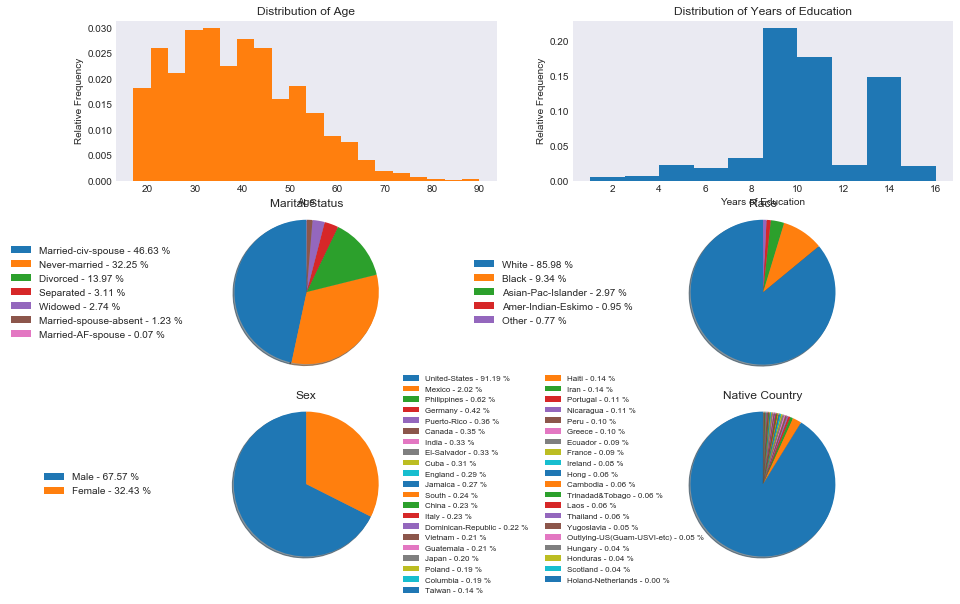

In [125]:
fig, axes = plt.subplots(nrows=3, ncols=2)
ax1 = axes[0, 0]
ax1.hist(clean_adult["age"], normed = True, bins = 20)
ax1.set_title("Distribution of Age")
ax1.set_xlabel("Age")

ax1 = axes[0, 0]
ax1.hist(clean_adult["age"], normed = True, bins = 20)
ax1.set_title("Distribution of Age")
ax1.set_xlabel("Age")
ax1.set_ylabel("Relative Frequency")

ax2 = axes[0, 1]
ax2.hist(clean_adult["education.num"], normed = True)
ax2.set_title("Distribution of Years of Education")
ax2.set_xlabel("Years of Education")
ax2.set_ylabel("Relative Frequency")

ax3 = axes[1, 0]
counts = clean_adult["marital.status"].value_counts()
percents = 100 * counts.values/counts.values.sum()
patches, texts = ax3.pie(percents, shadow=True, startangle=90)
ax3.axis("equal")
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
ax3.legend(patches, labels, loc="center", bbox_to_anchor=(-0.05, 0.5),
           fontsize=10)
ax3.set_title("Marital Status")

ax4 = axes[1, 1]
counts = clean_adult["race"].value_counts()
percents = 100 * counts.values/counts.values.sum()
patches, texts = ax4.pie(percents, shadow=True, startangle=90)
ax4.axis("equal")
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
ax4.legend(patches, labels, loc="center", bbox_to_anchor=(-0.05, 0.5),
           fontsize=10)
ax4.set_title("Race")

ax5 = axes[2, 0]
counts = clean_adult["sex"].value_counts()
percents = 100 * counts.values/counts.values.sum()
patches, texts = ax5.pie(percents, shadow=True, startangle=90)
ax5.axis("equal")
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
ax5.legend(patches, labels, loc="center", bbox_to_anchor=(-0.05, 0.5),
           fontsize=10)
ax5.set_title("Sex")

ax6 = axes[2, 1]
counts = clean_adult["native.country"].value_counts()
percents = 100 * counts.values/counts.values.sum()
patches, texts = ax6.pie(percents, shadow=True, startangle=90)
ax6.axis("equal")
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
ax6.legend(patches, labels, loc="center", ncol = 2, bbox_to_anchor=(-0.05, 0.5),
           fontsize=8)
ax6.set_title("Native Country")

os.makedirs("fig", exist_ok=True)
fig.savefig("fig/columns.png")


In [124]:
os.makedirs("results", exist_ok=True) #Make results directory if it does not exist yet
clean_adult.to_hdf('results/df1.h5', 'clean_adult')
